In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
GI=pd.read_csv("Glass.csv")

In [3]:
GI

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
423,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
424,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
425,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
426,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
GI.index = GI.index +1

In [5]:
GI

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
1,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
424,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
425,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
426,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
427,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
GI.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
1,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
GI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 1 to 428
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          428 non-null    int64  
 1   RI          428 non-null    float64
 2   Na          428 non-null    float64
 3   Mg          428 non-null    float64
 4   Al          428 non-null    float64
 5   Si          428 non-null    float64
 6   K           428 non-null    float64
 7   Ca          428 non-null    float64
 8   Ba          428 non-null    float64
 9   Fe          428 non-null    float64
 10  Glass_Type  428 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 36.9 KB


In [10]:
GI.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,428.0,107.500000,61.848099,1.00000,54.00000,107.50000,161.00000,214.00000
RI,428.0,1.518365,0.003033,1.51115,1.51652,1.51768,1.51916,1.53393
Na,428.0,13.407850,0.815647,10.73000,12.90000,13.30000,13.83000,17.38000
Mg,428.0,2.684533,1.440718,0.00000,2.09000,3.48000,3.60000,4.49000
Al,428.0,1.444907,0.498685,0.29000,1.19000,1.36000,1.63000,3.50000
Si,428.0,72.650935,0.773638,69.81000,72.28000,72.79000,73.09000,75.41000
K,428.0,0.497056,0.651428,0.00000,0.12000,0.55500,0.61000,6.21000
Ca,428.0,8.956963,1.421486,5.43000,8.24000,8.60000,9.18000,16.19000
Ba,428.0,0.175047,0.496637,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,428.0,0.057009,0.097325,0.00000,0.00000,0.00000,0.10000,0.51000


In [12]:
GI.shape

(428, 11)

In [13]:
GI.count()

Id            428
RI            428
Na            428
Mg            428
Al            428
Si            428
K             428
Ca            428
Ba            428
Fe            428
Glass_Type    428
dtype: int64

In [14]:
GI['Glass_Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [15]:
GI['Glass_Type'].sort_values()

1      1
248    1
247    1
246    1
245    1
      ..
210    7
211    7
212    7
427    7
428    7
Name: Glass_Type, Length: 428, dtype: int64

<Axes: >

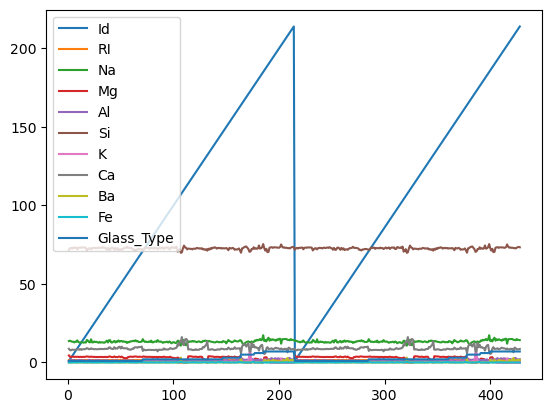

In [25]:
GI.plot()

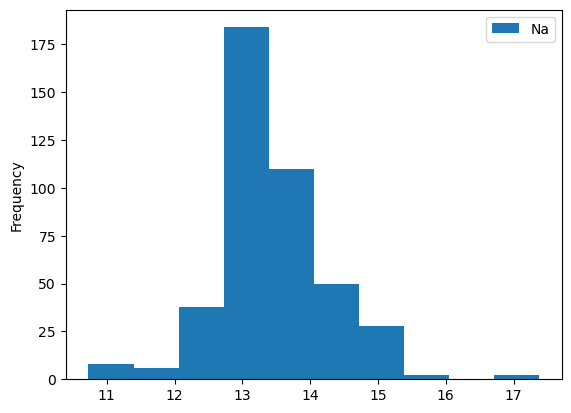

In [27]:
GI.plot(kind="hist",y="Na",x="Glass_Type")
plt.show()

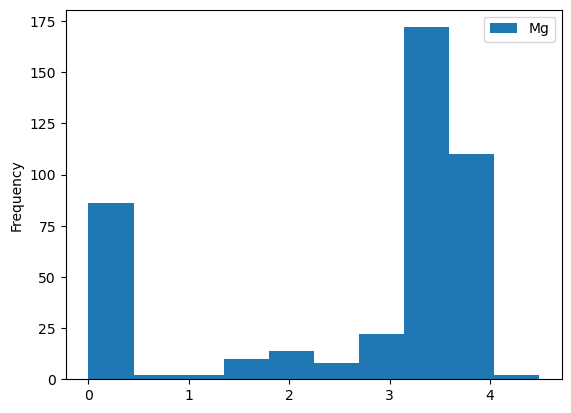

In [28]:
GI.plot(kind="hist",y="Mg",x="Glass_Type")
plt.show()

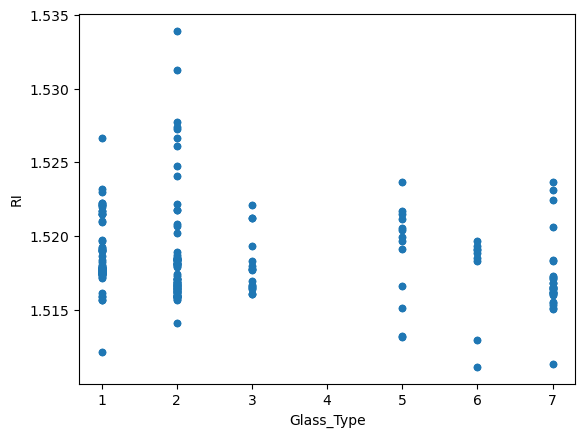

In [30]:
GI.plot(kind="scatter",y="RI",x="Glass_Type")
plt.show()

In [31]:
GI.corr()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


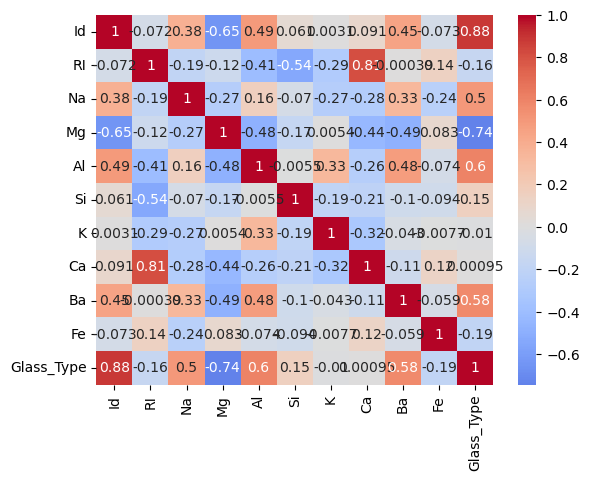

In [34]:
sns.heatmap(GI.corr(),annot=True,cmap='coolwarm',center=0)
plt.show()

In [16]:
GI['Glass_Type'].value_counts()

2    152
1    140
7     58
3     34
5     26
6     18
Name: Glass_Type, dtype: int64

<Figure size 1000x600 with 0 Axes>

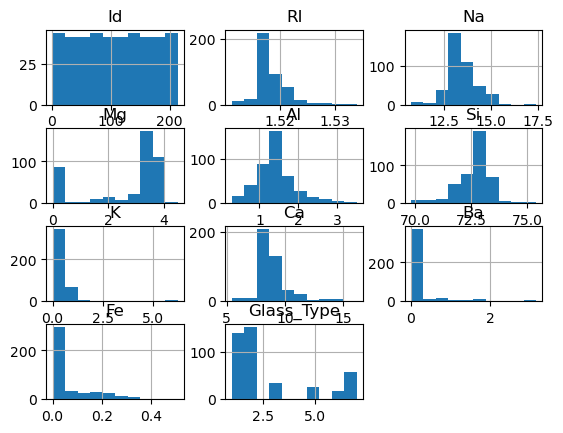

In [18]:
plt.figure(figsize=(10,6))
GI.hist()
plt.show()

TypeError: countplot() got multiple values for argument 'data'

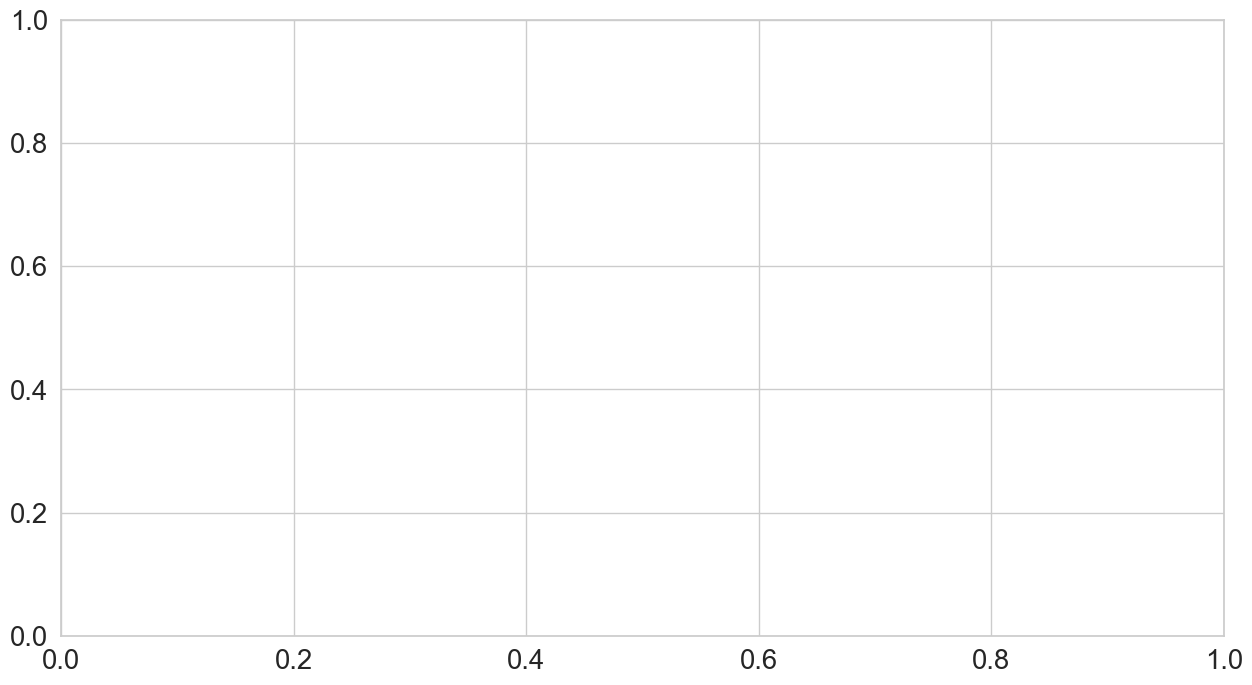

In [7]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Glass_Type',data=GI).set_title('Count of Glass Types')


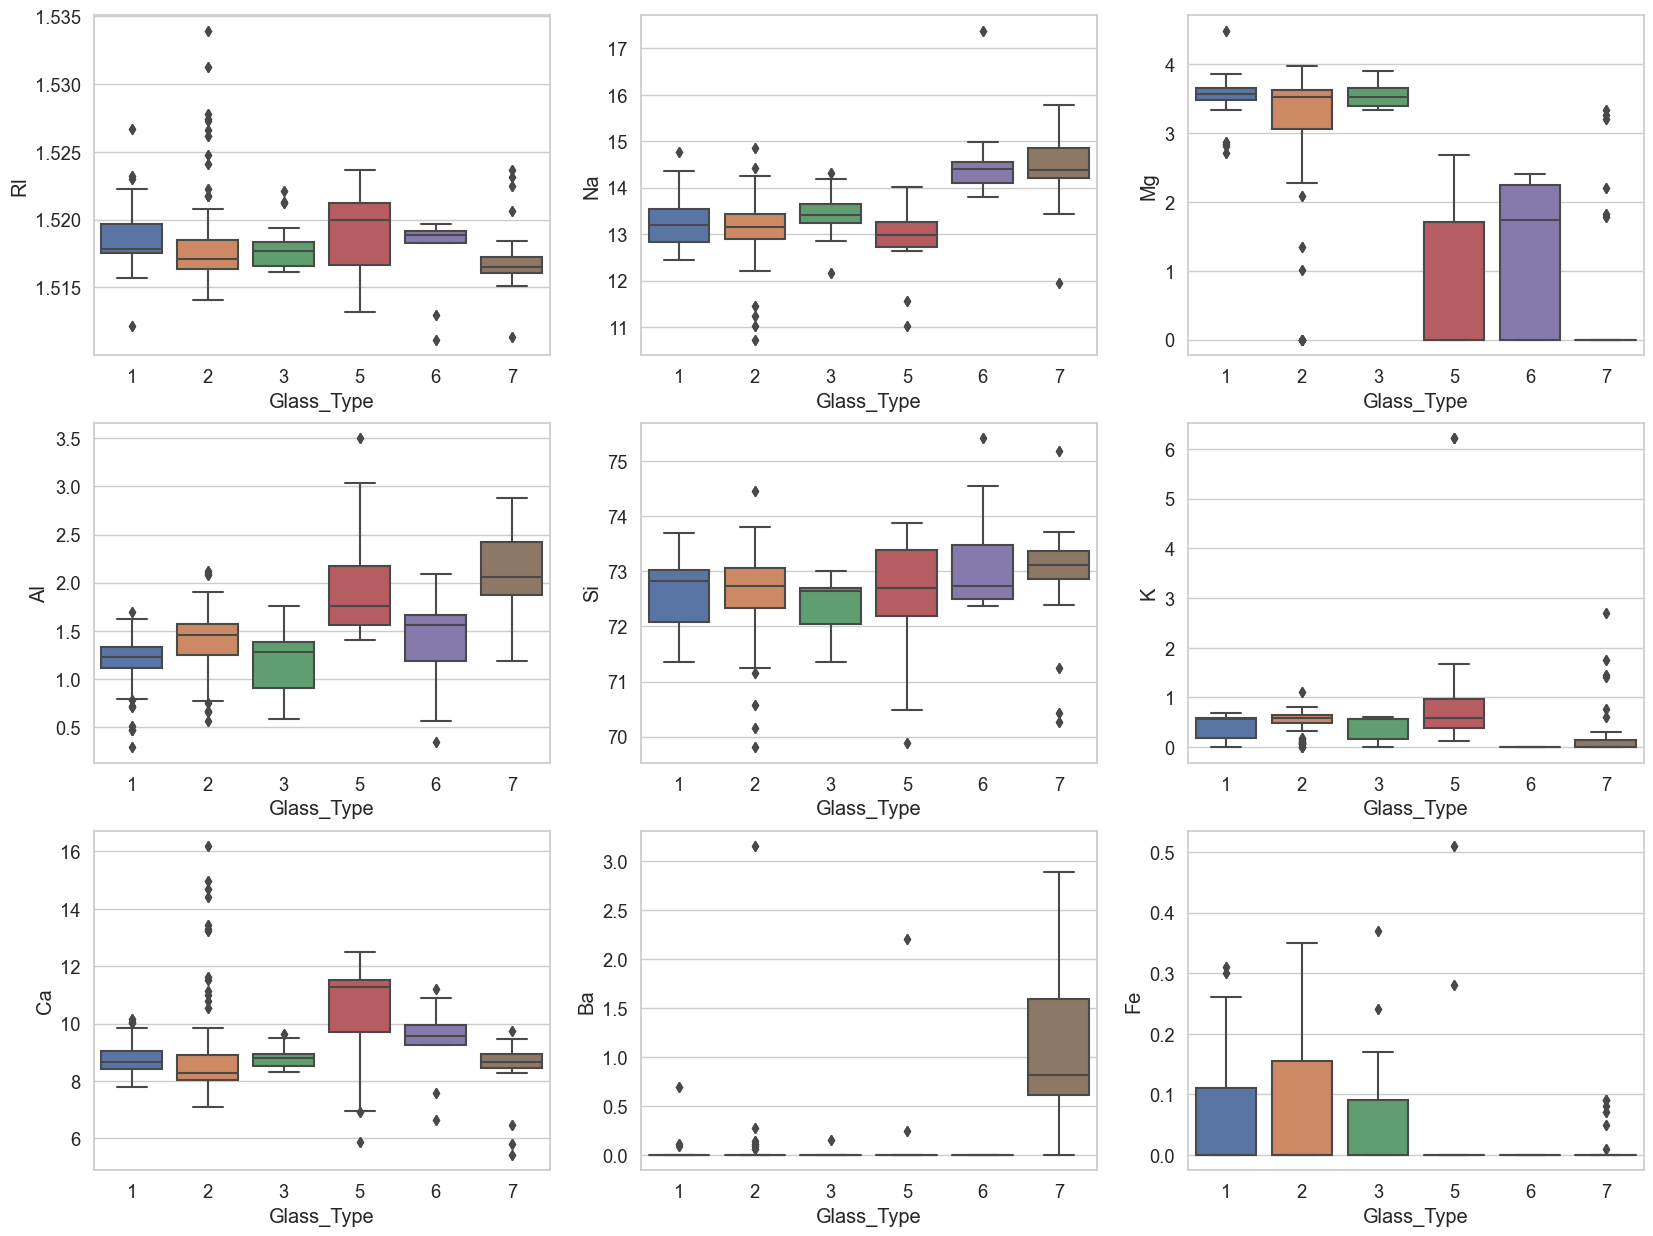

In [8]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Glass_Type', y='RI', data=GI)
plt.subplot(3,3,2)
sns.boxplot(x='Glass_Type', y='Na', data=GI)
plt.subplot(3,3,3)
sns.boxplot(x='Glass_Type', y='Mg', data=GI)
plt.subplot(3,3,4)
sns.boxplot(x='Glass_Type', y='Al', data=GI)
plt.subplot(3,3,5)
sns.boxplot(x='Glass_Type', y='Si', data=GI)
plt.subplot(3,3,6)
sns.boxplot(x='Glass_Type', y='K', data=GI)
plt.subplot(3,3,7)
sns.boxplot(x='Glass_Type', y='Ca', data=GI)
plt.subplot(3,3,8)
sns.boxplot(x='Glass_Type', y='Ba', data=GI)
plt.subplot(3,3,9)
sns.boxplot(x='Glass_Type', y='Fe', data=GI)
plt.show()

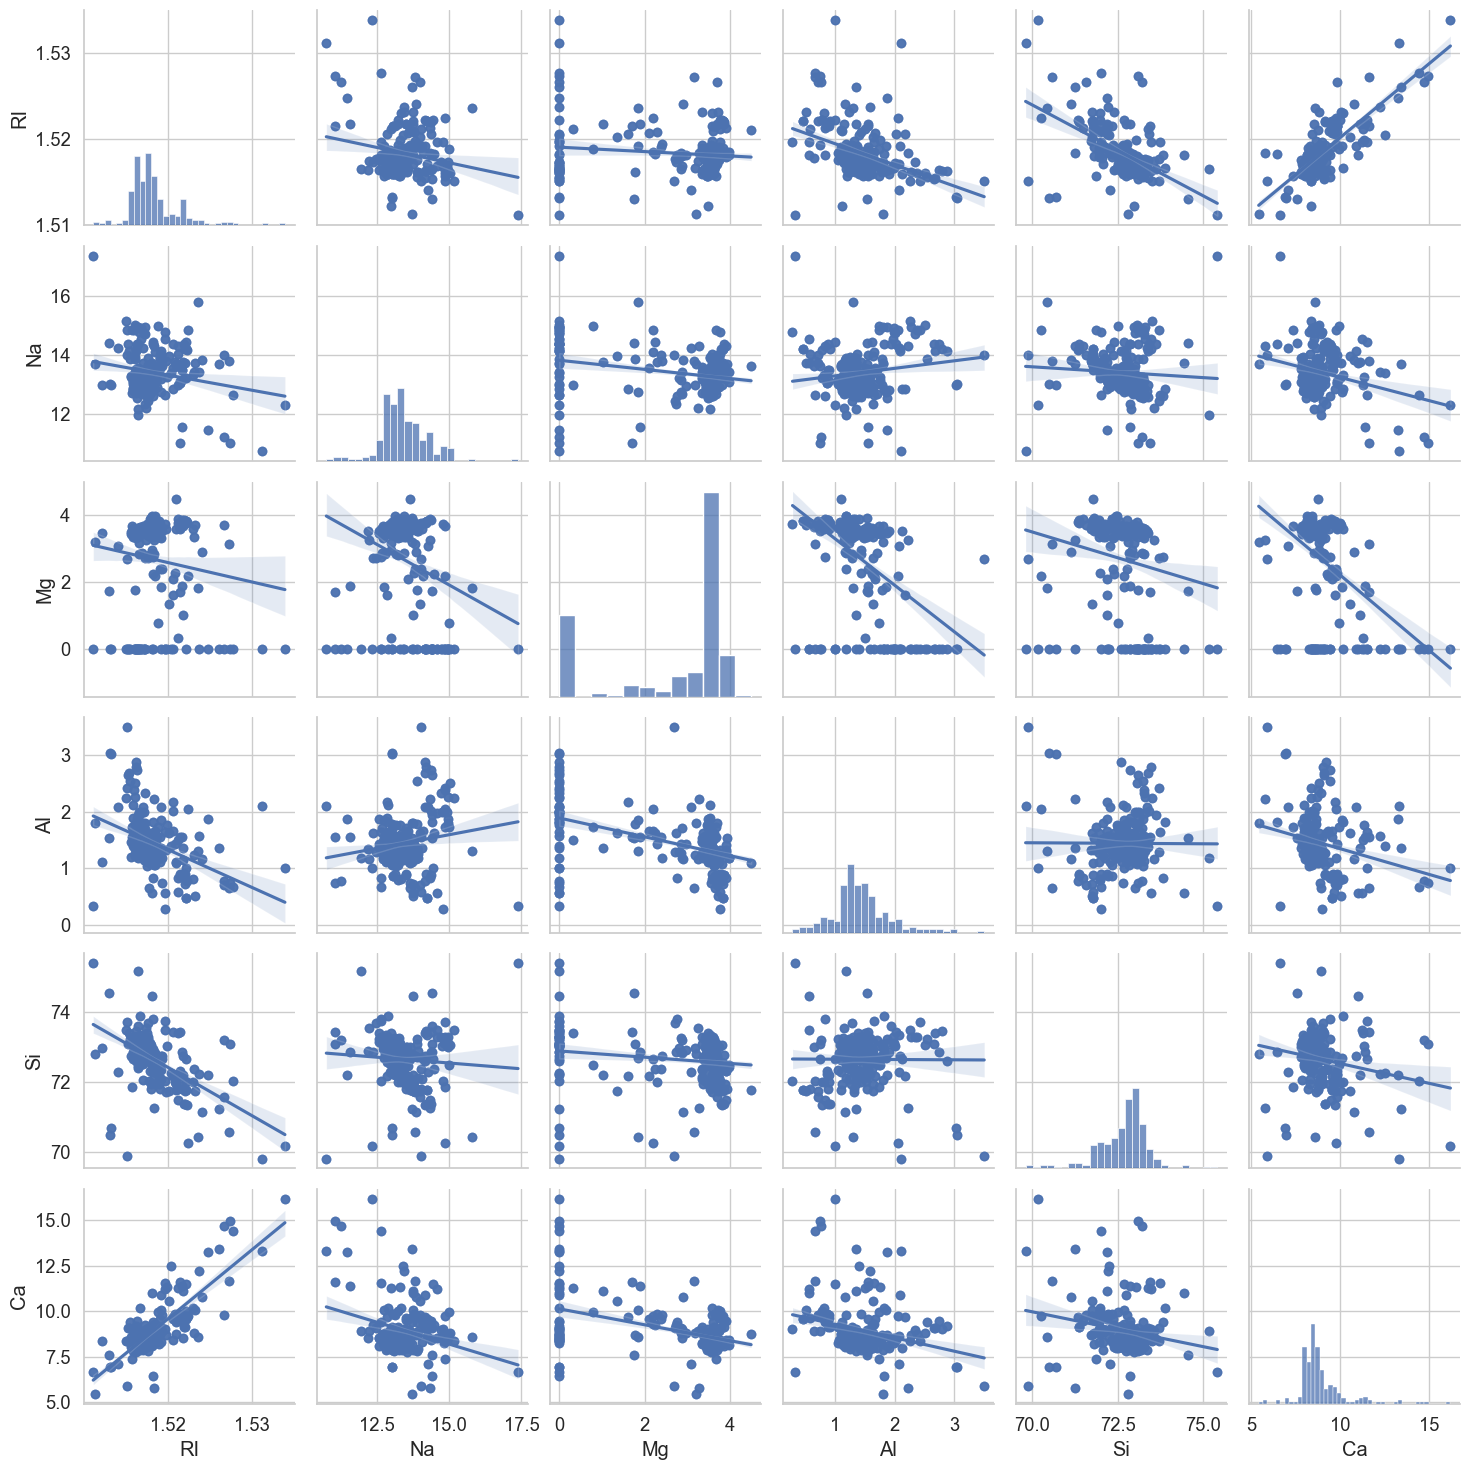

In [9]:
sns.pairplot(GI[['RI','Na','Mg','Al','Si','Ca']], kind='reg')


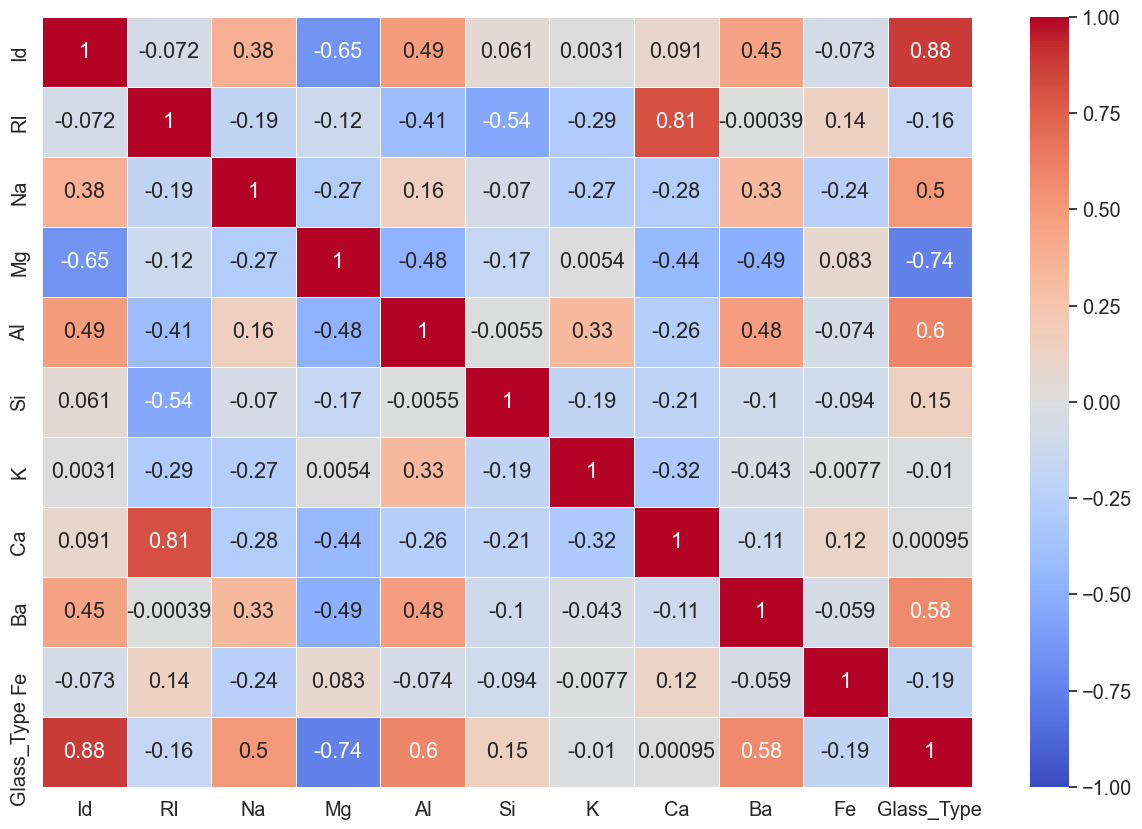

In [21]:
plt.subplots(figsize=(15,10))
sns.heatmap(GI.corr(),annot=True,vmin=-1.0,cmap='coolwarm',linewidth=.5)
plt.show()

<Figure size 640x480 with 0 Axes>

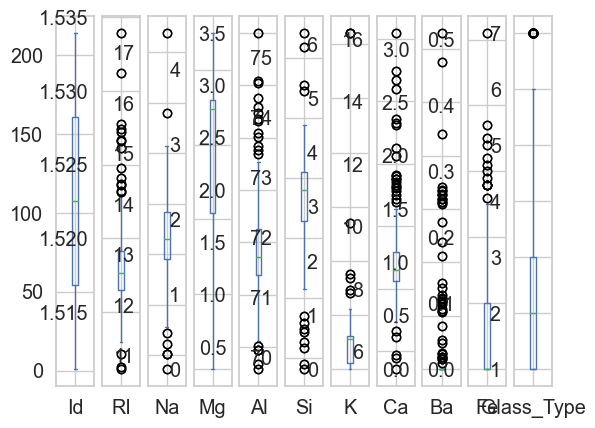

<Figure size 10000x10000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
GI.plot(kind='box',subplots=True)
plt.figure(figsize=(100,100))
plt.figure()